


```

cat ../NA12878.SVAs_and_HERVs_KWHE.e2e.all.positions.csv | awk -F: '{print $1}' | awk -F, '{print $1"|"int($2/10000)*10000 > "NA12878.SVAs_and_HERVs_KWHE.e2e.all.positions."$3".txt"}'

cat ../NA12878.primers.P.e2e.all.positions.csv | awk -F: '{print $1}' | awk -F, '{print $1"|"int($2/10000)*10000 > "NA12878.primers.P.e2e.all.positions."$3".txt"}'


#	ignoring UMI
for f in ../NA12878.??-??.P.e2e.all.positions.csv ; do
b=$(basename $f .csv)
cat $f | awk -F: '{print $1}' | awk -F, -v b=$b '{print $1"|"int($2/10000)*10000 > b".txt"}'
sort ${b}.txt | uniq -c > ${b}.uniqc.txt
done


for f in NA12878.primers.P.e2e.all.positions.*.txt ; do
b=$( basename $f .txt )
sort ${b}.txt | uniq -c > ${b}.uniqc.txt
done

for f in NA12878.SVAs_and_HERVs_KWHE.e2e.all.positions.*.txt ; do
b=$( basename $f .txt )
sort ${b}.txt | uniq -c > ${b}.uniqc.txt
done

merge_uniq-c.py --output NA12878-hybrid-HKLE-seq-merged.csv --int NA12878.SVAs_and_HERVs_KWHE.e2e.all.positions.*.uniqc.txt  NA12878.primers.P.e2e.all.positions.*.uniqc.txt NA12878.??-??.P.e2e.all.positions.uniqc.txt


sed -i -e '1s/NA12878.//g' -e '1s/.uniqc.txt//g' -e '1s/SVAs_and_HERVs_KWHE.e2e.all.positions.//g' -e '1s/primers.P.e2e.all.positions.//g' -e '1s/.P.e2e.all.positions//g' NA12878-hybrid-HKLE-seq-merged.csv








```






Positions rounded to 10,000 to account for the length of HERVK113

HKLE named columns are from explicit alignments of the complete reference to NA12878 assembly.

Columns similar to "HERV_03-04RC" are primer alignments.

Columns similar to "01-09" are grouped HKLE-Seq read alignments.




Different aligners with different guidelines and thresholds could have been used.
This particular analysis was done with bowtie2 and end-to-end.



In [1]:
import pandas as pd
pd.__version__

'1.1.5'

In [2]:
import matplotlib.pyplot as plt

In [3]:
# Adjust plot size
#options(repr.plot.width=16, repr.plot.height=6)

# For some reason, if this is in the same cell as the import command, it doesn't work.
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [4]:
import numpy as np

In [5]:
default_max_columns=pd.get_option('display.max_columns')

In [6]:
pd.set_option('display.max_columns', None)

In [29]:
default_precision=pd.get_option('display.precision')

In [30]:
pd.set_option('display.precision', 2)

In [7]:
sequence_groups=["01-09","10-18","19-27","28-36"]

In [8]:
primers=["HERV_03-04RC","HERV_03-05RC","HERV_03-06RC","HERV_04-05RC","HERV_04-06RC","HERV_05-06RC",
         "SVA_05-08RC","SVA_05-09RC","SVA_06-08RC","SVA_06-09RC","SVA_07-08RC","SVA_07-09RC","SVA_10-11RC"]

In [9]:
hkles=["HERVE","HERVH","HERVH48I","HERVK","HERVK10","HERVK11","HERVK113",
       "HERVK119","HERVK11I","HERVK13I","HERVK14CI","HERVK14I",
       "HERVK22I","HERVK9I","HERVKC4","HERVW17",
       "SVA_A","SVA_B","SVA_C","SVA_D","SVA_E","SVA_F"]

# Read raw reference rounded positions

In [10]:
df=pd.read_csv("NA12878-hybrid-HKLE-seq-merged.csv")
df.head()

,sequence,HERVE,HERVH,HERVH48I,HERVK,HERVK10,HERVK11,HERVK113,HERVK119,HERVK11I,HERVK13I,HERVK14CI,HERVK14I,HERVK22I,HERVK9I,HERVKC4,HERVW17,SVA_A,SVA_B,SVA_C,SVA_D,SVA_E,SVA_F,HERV_03-04RC,HERV_03-05RC,HERV_03-06RC,HERV_04-05RC,HERV_04-06RC,HERV_05-06RC,SVA_05-08RC,SVA_05-09RC,SVA_06-08RC,SVA_06-09RC,SVA_07-08RC,SVA_07-09RC,SVA_10-11RC,01-09,10-18,19-27,28-36
0,scf7180000012818|0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
1,scf7180000012818|100000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
2,scf7180000012818|150000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,8,0,0
3,scf7180000012818|170000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,12,0,0
4,scf7180000012818|40000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,8,0,0


In [11]:
df[['sequence','position']] = df['sequence'].str.split("|", 1, expand=True)
df.head()

,sequence,HERVE,HERVH,HERVH48I,HERVK,HERVK10,HERVK11,HERVK113,HERVK119,HERVK11I,HERVK13I,HERVK14CI,HERVK14I,HERVK22I,HERVK9I,HERVKC4,HERVW17,SVA_A,SVA_B,SVA_C,SVA_D,SVA_E,SVA_F,HERV_03-04RC,HERV_03-05RC,HERV_03-06RC,HERV_04-05RC,HERV_04-06RC,HERV_05-06RC,SVA_05-08RC,SVA_05-09RC,SVA_06-08RC,SVA_06-09RC,SVA_07-08RC,SVA_07-09RC,SVA_10-11RC,01-09,10-18,19-27,28-36,position
0,scf7180000012818,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
1,scf7180000012818,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,100000
2,scf7180000012818,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,8,0,0,150000
3,scf7180000012818,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,12,0,0,170000
4,scf7180000012818,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,8,0,0,40000


In [12]:
df.set_index(['sequence','position'],inplace=True)
df.head()

HERVE  HERVH  HERVH48I  HERVK  HERVK10  HERVK11  \
sequence         position                                                    
scf7180000012818 0             0      0         0      0        0        0   
                 100000        0      0         0      0        0        0   
                 150000        0      0         0      0        0        0   
                 170000        0      0         0      0        0        0   
                 40000         0      0         0      0        0        0   

                           HERVK113  HERVK119  HERVK11I  HERVK13I  HERVK14CI  \
sequence         position                                                      
scf7180000012818 0                0         0         0         0          0   
                 100000           0         0         0         0          0   
                 150000           0         0         0         0          0   
                 170000           0         0         0         0          0   
                 40000            0         0         0         0          0   

                           HERVK14I  HERVK22I  HERVK9I  HERVKC4  HERVW17  \
sequence         position                                                  
scf7180000012818 0                0         0        0        0        0   
                 100000           0         0        0        0        0   
                 150000           0         0        0        0        0   
                 170000           0         0        0        0        0   
                 40000            0         0        0        0        0   

                           SVA_A  SVA_B  SVA_C  SVA_D  SVA_E  SVA_F  \
sequence         position                                             
scf7180000012818 0             0      0      0      0      0      0   
                 100000        0      0      0      0      0      0   
                 150000        0      0      0      0      0      0   
                 170000        0      0      0      0      0      0   
                 40000         0      0      0      0      0      0   

                           HERV_03-04RC  HERV_03-05RC  HERV_03-06RC  \
sequence         position                                             
scf7180000012818 0                    0             0             0   
                 100000               0             0             0   
                 150000               0             0             0   
                 170000               0             0             0   
                 40000                0             0             0   

                           HERV_04-05RC  HERV_04-06RC  HERV_05-06RC  \
sequence         position                                             
scf7180000012818 0                    0             0             0   
                 100000               0             0             0   
                 150000               0             0             0   
                 170000               0             0             0   
                 40000                0             0             0   

                           SVA_05-08RC  SVA_05-09RC  SVA_06-08RC  SVA_06-09RC  \
sequence         position                                                       
scf7180000012818 0                   0            0            0            0   
                 100000              0            0            0            0   
                 150000              0            0            0            0   
                 170000              0            0            0            0   
                 40000               0            0            0            0   

                           SVA_07-08RC  SVA_07-09RC  SVA_10-11RC  01-09  \
sequence         position                                                 
scf7180000012818 0                   0            0            0      0   
                 100000              0            0            0      0   
                 150000 

In [13]:
df[df['HERVK113']>0]

HERVE  HERVH  HERVH48I  HERVK  HERVK10  HERVK11  \
sequence         position                                                    
scf7180000012857 4890000       0      0         0      1        1        0   
scf7180000012874 6770000       0      0         0      1        1        0   
scf7180000012875 19310000      0      0         0      1        1        0   
scf7180000012913 400000        0      0         0      1        1        0   
                 5440000       0      0         0      1        1        0   
scf7180000012960 640000        0      0         0      1        1        0   
scf7180000012999 19070000      0      0         0      1        1        0   
scf7180000013020 4570000       0      0         0      1        1        0   
scf7180000013171 850000        0      0         0      1        1        0   
scf7180000013243 2110000       0      0         0      2        2        0   
scf7180000013254 11240000      0      0         0      1        1        0   
scf7180000013640 420000        0      0         0      1        1        0   
scf7180000013741 1700000       0      0         0      1        1        0   
scf7180000017630 12690000      0      0         0      1        1        0   
scf7180000017632 1110000       0      0         0      1        1        0   
scf7180000017642 42660000      0      0         0      1        1        0   
scf7180000017648 30520000      0      0         0      1        1        0   

                           HERVK113  HERVK119  HERVK11I  HERVK13I  HERVK14CI  \
sequence         position                                                      
scf7180000012857 4890000          1         1         0         0          0   
scf7180000012874 6770000          1         0         0         0          0   
scf7180000012875 19310000         1         0         0         0          0   
scf7180000012913 400000           1         0         0         0          0   
                 5440000          1         0         0         0          0   
scf7180000012960 640000           1         0         0         0          0   
scf7180000012999 19070000         1         0         0         0          0   
scf7180000013020 4570000          1         0         0         0          0   
scf7180000013171 850000           1         0         0         0          0   
scf7180000013243 2110000          2         0         0         0          0   
scf7180000013254 11240000         1         0         0         0          0   
scf7180000013640 420000           1         0         0         0          0   
scf7180000013741 1700000          1         0         0         0          0   
scf7180000017630 12690000         1         0         0         0          0   
scf7180000017632 1110000          1         0         0         0          0   
scf7180000017642 42660000         1         0         0         0          0   
scf7180000017648 30520000         1         0         0         0          0   

                           HERVK14I  HERVK22I  HERVK9I  HERVKC4  HERVW17  \
sequence         position                                                  
scf7180000012857 4890000          0         0        0        0        0   
scf7180000012874 6770000          0         0        0        0        0   
scf7180000012875 19310000         0         0        0        0        0   
scf7180000012913 400000           0         0        0        0        0   
                 5440000          0         0        0        0        0   
scf7180000012960 640000           0         0        0        0        0   
scf7180000012999 19070000         0         0        0        0        0   
scf7180000013020 4570000          0         0        0        0        0   
scf7180000013171 850000           0         0        0        0        0   
scf7180000013243 2110000          0         0        0        0        0   
scf7180000013254 11240000         0         0        0        0        0   
scf7180000013640 420000           0

In [14]:
len(df[df['HERVK113']>0])

17

In [15]:
pa=df.copy()

In [16]:
pa[(pa>0)]=1

In [17]:
pa.head()

HERVE  HERVH  HERVH48I  HERVK  HERVK10  HERVK11  \
sequence         position                                                    
scf7180000012818 0             0      0         0      0        0        0   
                 100000        0      0         0      0        0        0   
                 150000        0      0         0      0        0        0   
                 170000        0      0         0      0        0        0   
                 40000         0      0         0      0        0        0   

                           HERVK113  HERVK119  HERVK11I  HERVK13I  HERVK14CI  \
sequence         position                                                      
scf7180000012818 0                0         0         0         0          0   
                 100000           0         0         0         0          0   
                 150000           0         0         0         0          0   
                 170000           0         0         0         0          0   
                 40000            0         0         0         0          0   

                           HERVK14I  HERVK22I  HERVK9I  HERVKC4  HERVW17  \
sequence         position                                                  
scf7180000012818 0                0         0        0        0        0   
                 100000           0         0        0        0        0   
                 150000           0         0        0        0        0   
                 170000           0         0        0        0        0   
                 40000            0         0        0        0        0   

                           SVA_A  SVA_B  SVA_C  SVA_D  SVA_E  SVA_F  \
sequence         position                                             
scf7180000012818 0             0      0      0      0      0      0   
                 100000        0      0      0      0      0      0   
                 150000        0      0      0      0      0      0   
                 170000        0      0      0      0      0      0   
                 40000         0      0      0      0      0      0   

                           HERV_03-04RC  HERV_03-05RC  HERV_03-06RC  \
sequence         position                                             
scf7180000012818 0                    0             0             0   
                 100000               0             0             0   
                 150000               0             0             0   
                 170000               0             0             0   
                 40000                0             0             0   

                           HERV_04-05RC  HERV_04-06RC  HERV_05-06RC  \
sequence         position                                             
scf7180000012818 0                    0             0             0   
                 100000               0             0             0   
                 150000               0             0             0   
                 170000               0             0             0   
                 40000                0             0             0   

                           SVA_05-08RC  SVA_05-09RC  SVA_06-08RC  SVA_06-09RC  \
sequence         position                                                       
scf7180000012818 0                   0            0            0            0   
                 100000              0            0            0            0   
                 150000              0            0            0            0   
                 170000              0            0            0            0   
                 40000               0            0            0            0   

                           SVA_07-08RC  SVA_07-09RC  SVA_10-11RC  01-09  \
sequence         position                                                 
scf7180000012818 0                   0            0            0      0   
                 100000              0            0            0      0   
                 150000 

In [18]:
pa[pa['HERVK113']>0]

HERVE  HERVH  HERVH48I  HERVK  HERVK10  HERVK11  \
sequence         position                                                    
scf7180000012857 4890000       0      0         0      1        1        0   
scf7180000012874 6770000       0      0         0      1        1        0   
scf7180000012875 19310000      0      0         0      1        1        0   
scf7180000012913 400000        0      0         0      1        1        0   
                 5440000       0      0         0      1        1        0   
scf7180000012960 640000        0      0         0      1        1        0   
scf7180000012999 19070000      0      0         0      1        1        0   
scf7180000013020 4570000       0      0         0      1        1        0   
scf7180000013171 850000        0      0         0      1        1        0   
scf7180000013243 2110000       0      0         0      1        1        0   
scf7180000013254 11240000      0      0         0      1        1        0   
scf7180000013640 420000        0      0         0      1        1        0   
scf7180000013741 1700000       0      0         0      1        1        0   
scf7180000017630 12690000      0      0         0      1        1        0   
scf7180000017632 1110000       0      0         0      1        1        0   
scf7180000017642 42660000      0      0         0      1        1        0   
scf7180000017648 30520000      0      0         0      1        1        0   

                           HERVK113  HERVK119  HERVK11I  HERVK13I  HERVK14CI  \
sequence         position                                                      
scf7180000012857 4890000          1         1         0         0          0   
scf7180000012874 6770000          1         0         0         0          0   
scf7180000012875 19310000         1         0         0         0          0   
scf7180000012913 400000           1         0         0         0          0   
                 5440000          1         0         0         0          0   
scf7180000012960 640000           1         0         0         0          0   
scf7180000012999 19070000         1         0         0         0          0   
scf7180000013020 4570000          1         0         0         0          0   
scf7180000013171 850000           1         0         0         0          0   
scf7180000013243 2110000          1         0         0         0          0   
scf7180000013254 11240000         1         0         0         0          0   
scf7180000013640 420000           1         0         0         0          0   
scf7180000013741 1700000          1         0         0         0          0   
scf7180000017630 12690000         1         0         0         0          0   
scf7180000017632 1110000          1         0         0         0          0   
scf7180000017642 42660000         1         0         0         0          0   
scf7180000017648 30520000         1         0         0         0          0   

                           HERVK14I  HERVK22I  HERVK9I  HERVKC4  HERVW17  \
sequence         position                                                  
scf7180000012857 4890000          0         0        0        0        0   
scf7180000012874 6770000          0         0        0        0        0   
scf7180000012875 19310000         0         0        0        0        0   
scf7180000012913 400000           0         0        0        0        0   
                 5440000          0         0        0        0        0   
scf7180000012960 640000           0         0        0        0        0   
scf7180000012999 19070000         0         0        0        0        0   
scf7180000013020 4570000          0         0        0        0        0   
scf7180000013171 850000           0         0        0        0        0   
scf7180000013243 2110000          0         0        0        0        0   
scf7180000013254 11240000         0         0        0        0        0   
scf7180000013640 420000           0

In [19]:
hkle_counts=pd.DataFrame()
for hkle in hkles:
    hkle_counts.loc[hkle,'count']=len(pa[pa[hkle]>0])
    for g in sequence_groups:
        hkle_counts.loc[hkle,g]=pa[pa[hkle]>0][[g]].sum()[0]

In [20]:
hkle_counts

,count,01-09,10-18,19-27,28-36
HERVE,13.0,0.0,0.0,0.0,0.0
HERVH,2.0,0.0,0.0,0.0,0.0
HERVH48I,2.0,0.0,0.0,0.0,0.0
HERVK,19.0,16.0,19.0,13.0,13.0
HERVK10,18.0,15.0,18.0,11.0,11.0
HERVK11,1.0,1.0,1.0,1.0,1.0
HERVK113,17.0,14.0,17.0,11.0,11.0
HERVK119,1.0,1.0,1.0,1.0,1.0
HERVK11I,5.0,0.0,0.0,0.0,0.0
HERVK13I,1.0,0.0,0.0,0.0,0.0


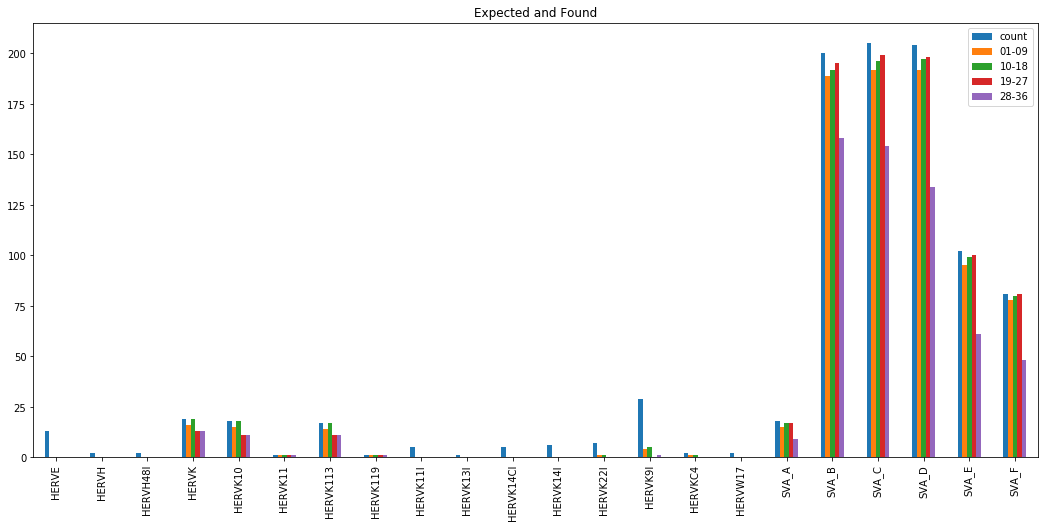

In [21]:
hkle_counts.plot.bar(y=['count']+sequence_groups,title="Expected and Found")

In [22]:
hkle_percentage=pd.DataFrame()
for hkle in hkles:
    hkle_percentage.loc[hkle,'count']=len(pa[pa[hkle]>0])
    for g in sequence_groups:
        hkle_percentage.loc[hkle,g]=100*pa[pa[hkle]>0][[g]].sum()[0]/len(pa[pa[hkle]>0])

In [31]:
hkle_percentage

,count,01-09,10-18,19-27,28-36
HERVE,13.0,0.00,0.00,0.00,0.00
HERVH,2.0,0.00,0.00,0.00,0.00
HERVH48I,2.0,0.00,0.00,0.00,0.00
HERVK,19.0,84.21,100.00,68.42,68.42
HERVK10,18.0,83.33,100.00,61.11,61.11
HERVK11,1.0,100.00,100.00,100.00,100.00
HERVK113,17.0,82.35,100.00,64.71,64.71
HERVK119,1.0,100.00,100.00,100.00,100.00
HERVK11I,5.0,0.00,0.00,0.00,0.00
HERVK13I,1.0,0.00,0.00,0.00,0.00


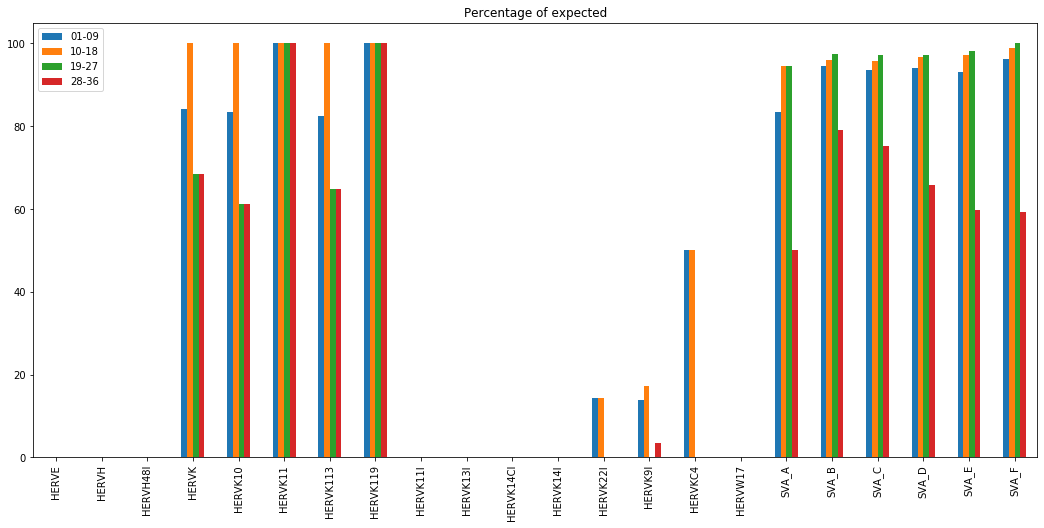

In [24]:
hkle_percentage.plot.bar(y=sequence_groups, title="Percentage of expected")

In [25]:
pd.set_option('display.max_columns', default_max_columns)

In [ ]:
pd.set_option('display.precision', default_precision)

6
